/Users/samsuidman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/samsuidman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  0%|          | 0/1000 [00:00<?, ?it/s]/Users/samsuidman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/samsuidman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
100%|██████████| 1000/1000 [00:01<00:00, 509.97it/s]


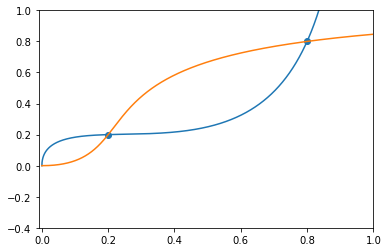

In [535]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import newton,fsolve
from tqdm import tqdm 
from scipy.signal import find_peaks
from scipy.interpolate import interp1d,interp2d,UnivariateSpline,CubicSpline


def F(u,o): 
    f = u**2/(u**2+o**2) 
    return f 

def G(v,o): 
    g = o*np.sqrt(v/(1-v)) 
    return g 

def fixed_points(w11,w22,w12,w21,o,test=False):
    x = np.linspace(0,1,10000)
    y1 = (G(x,o)-w11*x)/w12 
    y2_test = np.linspace(0,1,10000) 
    x2_test = (G(y2_test,o)-w22*y2_test)/w21 
    if find_peaks(np.abs(x2_test))[0]!=[]:
        i = find_peaks(np.abs(x2_test))[0][0]
        j = find_peaks(-np.abs(x2_test))[0][0]

        x2_test1 = x2_test[:i] # segment 1
        y2_test1 = y2_test[:i] # segment 1
        x1 = x[np.argmin(np.abs(x-np.min(x2_test1))):np.argmin(np.abs(x-np.max(x2_test1)))]
        y1_1 = y1[np.argmin(np.abs(x-np.min(x2_test1))):np.argmin(np.abs(x-np.max(x2_test1)))]
        y2_1 = interp1d(x2_test1,y2_test1,bounds_error=False)(x1)

        x2_test2 = x2_test[i:j] # segment 2
        y2_test2 = y2_test[i:j] # segment 2
        x2 = x[np.argmin(np.abs(x-np.min(x2_test2))):np.argmin(np.abs(x-np.max(x2_test2)))]
        y1_2 = y1[np.argmin(np.abs(x-np.min(x2_test2))):np.argmin(np.abs(x-np.max(x2_test2)))]
        y2_2 = interp1d(x2_test2,y2_test2,bounds_error=False)(x2)

        x2_test3 = x2_test[j:-1] # segment 3 
        y2_test3 = y2_test[j:-1] # segment 3 
        x3 = x[np.argmin(np.abs(x-np.min(x2_test3))):np.argmin(np.abs(x-np.max(x2_test3)))] 
        y1_3 = y1[np.argmin(np.abs(x-np.min(x2_test3))):np.argmin(np.abs(x-np.max(x2_test3)))] 
        y2_3 = interp1d(x2_test3,y2_test3,bounds_error=False)(x3) 

        x0,y0 = [],[] 
        x0.append(x1[find_peaks(-np.abs(y2_1-y1_1))[0]]) 
        y0.append(y1_1[find_peaks(-np.abs(y2_1-y1_1))[0]]) 
        x0.append(x2[find_peaks(-np.abs(y2_2-y1_2))[0]]) 
        y0.append(y1_2[find_peaks(-np.abs(y2_2-y1_2))[0]]) 
        x0.append(x3[find_peaks(-np.abs(y2_3-y1_3))[0]]) 
        y0.append(y1_3[find_peaks(-np.abs(y2_3-y1_3))[0]]) 
        x0 = np.concatenate(x0) 
        y0 = np.concatenate(y0) 
    else: 
        y2 = interp1d(x2_test,y2_test)(x) 
        x0 = x[find_peaks(-np.abs(y1-y2))[0]]
        y0 = y1[find_peaks(-np.abs(y1-y2))[0]]
        # x0,y0 = 0,0
    if test:
        return x0,y0,x,y1,x2_test,y2_test
    else:
        return x0,y0

def find_bifurcation(w11,w22,w12,w21):
    o_array = np.linspace(0.1,0.4,1000) 
    fp_length = np.zeros(len(o_array))
    for i,o in enumerate(tqdm(o_array)):
        x0,y0 = fixed_points(w11,w22,w12,w21,o)
        fp_length[i] = len(x0)
    fp_length = np.where(fp_length>3,np.nan,fp_length)
    return fp_length,o_array

w11,w22,w12,w21,o = 0.3,0.2,0.2,0.3,0.2 
x0,y0,x,y1,x2_test,y2_test = fixed_points(w11,w22,w12,w21,o,test=True) 

fig,ax = plt.subplots() 
ax.plot(x,y1) 
ax.plot(x2_test,y2_test) 
ax.scatter(x0,y0) 
ax.set_xlim([-0.01,1]) 
ax.set_ylim([-0.4,1]) 

fp_length,o_array = find_bifurcation(w11,w22,w12,w21) 
bifurcations = o_array[np.where(np.diff(fp_length)!=0)] 




In [536]:
bifurcations

array([0.1       , 0.1003003 , 0.1006006 , 0.1009009 , 0.1012012 ,
       0.1015015 , 0.1018018 , 0.1021021 , 0.1024024 , 0.1027027 ,
       0.103003  , 0.1033033 , 0.1036036 , 0.1039039 , 0.1042042 ,
       0.1045045 , 0.1048048 , 0.10510511, 0.10540541, 0.10570571,
       0.10600601, 0.10630631, 0.10660661, 0.10690691, 0.10720721,
       0.10750751, 0.10780781, 0.10810811, 0.10840841, 0.10870871,
       0.10900901, 0.10930931, 0.10960961, 0.10990991, 0.11021021,
       0.11051051, 0.11081081, 0.11111111, 0.11141141, 0.11171171,
       0.11201201, 0.11231231, 0.11261261, 0.11291291, 0.11321321,
       0.11351351, 0.11381381, 0.11411411, 0.11441441, 0.11471471,
       0.11501502, 0.11531532, 0.11561562, 0.11591592, 0.11621622,
       0.11651652, 0.11681682, 0.11711712, 0.11741742, 0.11771772,
       0.11801802, 0.11831832, 0.11861862, 0.11891892, 0.11921922,
       0.11951952, 0.11981982, 0.12012012, 0.12042042, 0.12072072,
       0.12102102, 0.12132132, 0.12162162, 0.12192192, 0.12222